# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [117]:
# Load pickled data
import pickle
import numpy as np
import os

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/carnd/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p'
validation_file='/home/carnd/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/valid.p'
testing_file = '/home/carnd/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("\nTraining set   : Feature set X_train is a", type(X_train), "of length ", len(X_train))
print("                    Label set Y_train is a", type(y_train), "of length ", len(y_train))

print("\nValidation set : Feature set X_valid is a", type(X_valid), "of length ", len(X_valid))
print("                    Label set Y_valid is a", type(y_valid), "of length ", len(y_valid))

print("\nTest set       : Feature set X_test is a", type(X_test), "of length ", len(X_test))
print("                    Label set Y_test is a", type(y_test), "of length ", len(y_test))

print('\nTraining set X_train is a ', type(X_train), ' of shape ', X_train.shape)

print('\nTraining set is classified into', len(np.unique(y_train)), 'distinct labels from', min(y_train), 'to', max(y_train))



Training set   : Feature set X_train is a <class 'numpy.ndarray'> of length  34799
                    Label set Y_train is a <class 'numpy.ndarray'> of length  34799

Validation set : Feature set X_valid is a <class 'numpy.ndarray'> of length  4410
                    Label set Y_valid is a <class 'numpy.ndarray'> of length  4410

Test set       : Feature set X_test is a <class 'numpy.ndarray'> of length  12630
                    Label set Y_test is a <class 'numpy.ndarray'> of length  12630

Training set X_train is a  <class 'numpy.ndarray'>  of shape  (34799, 32, 32, 3)

Training set is classified into 43 distinct labels from 0 to 42


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [118]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:len(X_train.shape)]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

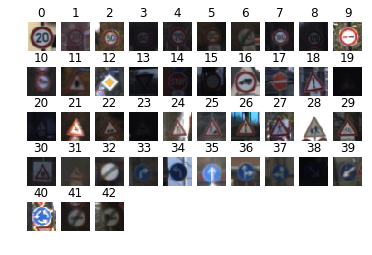

In [119]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

class_set = range(0,n_classes)
indxs =[]
for class_vals in class_set:
    for lbls in range(0,len(y_train)):
        if y_train[lbls] == class_vals:
            indxs.append(lbls)
            break

plot_images_per_row = 10
for i in range(0,len(indxs)):
    plt.subplot(len(indxs)//plot_images_per_row+1, plot_images_per_row, i+1)
    plt.imshow(X_train[indxs[i]])
    plt.axis('off')
    plt.title(i)
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

preprocessing 
converting to gray scale..... 
normalizing image.....

Training set after pre-processing is <class 'numpy.ndarray'> of shape (34799, 32, 32, 1)

Sample image before and after preprocessing 


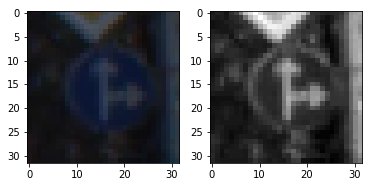

In [120]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
from skimage import exposure

def pre_process(image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

def normalize_img(image):
    norm_img = np.zeros(image.shape)
    return cv2.normalize(image,norm_img,alpha=0.0,beta=1.0,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

def exp_equalize(image):
    return exposure.equalize_adapthist(image)
    
#plot a sample color image before pre-processing
plt.subplot(1,2,1)
plt.imshow(X_train[1000])

#print(X_train.shape)
#process all feature sets from color to grayscale 
X_train = np.array([pre_process(image) for image in X_train])
X_train = np.array([normalize_img(image) for image in X_train])
#X_train = np.array([exp_equalize(image) for image in X_train])
X_train = np.expand_dims(X_train,axis=3)  #expand dimensions to suit input to lenet (32x32x1)
print('preprocessing \nconverting to gray scale..... \nnormalizing image.....')

X_valid = np.array([pre_process(image) for image in X_valid])
X_valid = np.array([normalize_img(image) for image in X_valid])
#X_valid = np.array([exp_equalize(image) for image in X_valid])
X_valid = np.expand_dims(X_valid,axis=3)  #expand dimensions to suit input to lenet (32x32x1)
 
    
X_test = np.array([pre_process(image) for image in X_test])
X_test = np.array([normalize_img(image) for image in X_test])
#X_test = np.array([exp_equalize(image) for image in X_test])
X_test = np.expand_dims(X_test,axis=3)  #expand dimensions to suit input to lenet (32x32x1)

#plot the image after RGB2Gray
plt.subplot(1,2,2)
plt.imshow(X_train[1000].squeeze(), cmap='gray')  #squeeze to remove redundant dimensions (32x32x1) -> 32x32
plt.show

print("\nTraining set after pre-processing is", type(X_train), "of shape", X_train.shape, )
print('\nSample image before and after preprocessing ')

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Model Architecture

In [21]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [22]:
import tensorflow as tf

EPOCHS = 200
BATCH_SIZE = 128
drop1 = 0.5
drop2 = 0.5

In [23]:
from tensorflow.contrib.layers import flatten

def LeNet(x, dr1, dr2):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 108), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(108))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 108, 108), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(108))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    #Feedforward with or without additional 2nd stage subsampling
    fc0_multi = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    fc0_multi = flatten(fc0_multi)
    #fc0_multi = flatten(conv1)
        
    fc0 = tf.concat(1,[fc0,fc0_multi])
    #print(fc0.get_shape())
    # Without 2nd stage subsampling 14x14x108+5x5x108 = 21168+2700 = 23868
    # With additional 2nd stage subsampling 7x7x108+5x5x108 = 5292+2700 = 7992
    
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(7992, 100), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(100))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    #Dropout
    fc1    = tf.nn.dropout(fc1,dr1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(100, 50), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(50))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    #Dropout
    fc2    = tf.nn.dropout(fc2,dr2)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(50, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [24]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob_fc1 = tf.placeholder(tf.float32)
keep_prob_fc2 = tf.placeholder(tf.float32)

In [25]:
rate = 0.0001

logits = LeNet(x, keep_prob_fc1, keep_prob_fc2)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [26]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, dr1, dr2):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_fc1: 1.0, keep_prob_fc2: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [27]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_fc1: drop1, keep_prob_fc2: drop2})
            
        validation_accuracy = evaluate(X_valid, y_valid, 1.0, 1.0)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet_final')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.263

EPOCH 2 ...
Validation Accuracy = 0.457

EPOCH 3 ...
Validation Accuracy = 0.595

EPOCH 4 ...
Validation Accuracy = 0.684

EPOCH 5 ...
Validation Accuracy = 0.732

EPOCH 6 ...
Validation Accuracy = 0.769

EPOCH 7 ...
Validation Accuracy = 0.797

EPOCH 8 ...
Validation Accuracy = 0.812

EPOCH 9 ...
Validation Accuracy = 0.829

EPOCH 10 ...
Validation Accuracy = 0.842

EPOCH 11 ...
Validation Accuracy = 0.847

EPOCH 12 ...
Validation Accuracy = 0.857

EPOCH 13 ...
Validation Accuracy = 0.858

EPOCH 14 ...
Validation Accuracy = 0.879

EPOCH 15 ...
Validation Accuracy = 0.876

EPOCH 16 ...
Validation Accuracy = 0.888

EPOCH 17 ...
Validation Accuracy = 0.896

EPOCH 18 ...
Validation Accuracy = 0.893

EPOCH 19 ...
Validation Accuracy = 0.898

EPOCH 20 ...
Validation Accuracy = 0.909

EPOCH 21 ...
Validation Accuracy = 0.912

EPOCH 22 ...
Validation Accuracy = 0.918

EPOCH 23 ...
Validation Accuracy = 0.918

EPOCH 24 ...
Validation Accura

In [41]:
#test accuracy
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess,'./lenet_final')
    
    test_accuracy = evaluate(X_test, y_test, 1.0, 1.0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
        

Test Accuracy = 0.954


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Images from the web to classify....


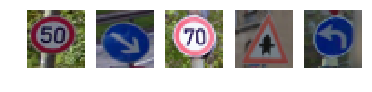

In [43]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
from sklearn import preprocessing

web_images_dir = '/home/carnd/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/web_images/'
image_names = os.listdir(web_images_dir)
web_images = []
y_webimages = [2,38,4,11,34]
print("Images from the web to classify....")
for im in range(0,len(image_names)):
    if image_names[im].endswith('.png'):
        image = plt.imread(web_images_dir + image_names[im])
        web_images.append(image[:,:,0:3])
        #print('image', im, 'is a ', type(web_images[im]), 'of shape', web_images[im].shape)
        plt.subplot(1, len(image_names), im+1)
        plt.axis('off')
        plt.imshow(web_images[im])

#print('web_images is a ', type(web_images), 'and length of', len(web_images))      
web_images = np.array(web_images)
#print('web_images is a ', type(web_images), 'of shape', web_images.shape,'and length of', len(web_images))      


### Predict the Sign Type for Each Image

Preprocessing the images...


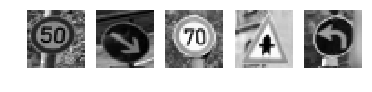

In [46]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

X_webimages = np.array([pre_process(image) for image in web_images])
X_webimages = np.array([normalize_img(image) for image in X_webimages])
#X_valid = np.array([exp_equalize(image) for image in X_valid])
X_webimages = np.expand_dims(X_webimages,axis=3)  #expand dimensions to suit input to lenet (32x32x1)

print("Preprocessing the images...")
for i in range(0, len(X_webimages)):
    plt.subplot(1, len(X_webimages), i+1)
    plt.imshow(X_webimages[i].squeeze(), cmap = 'gray')
    plt.axis('off')

   

In [36]:
#predict web_images
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess,'./lenet_final')
    softmax_web = sess.run(tf.nn.softmax(logits),  feed_dict={x: X_webimages, keep_prob_fc1: 1.0, keep_prob_fc2: 1.0})
    #print(softmax_web)
    
    top5_probs = sess.run(tf.nn.top_k(softmax_web,k = 5))
    #print(top5_probs)
    
    


   **************************************** IMAGES AND PREDICTIONS *************************************************


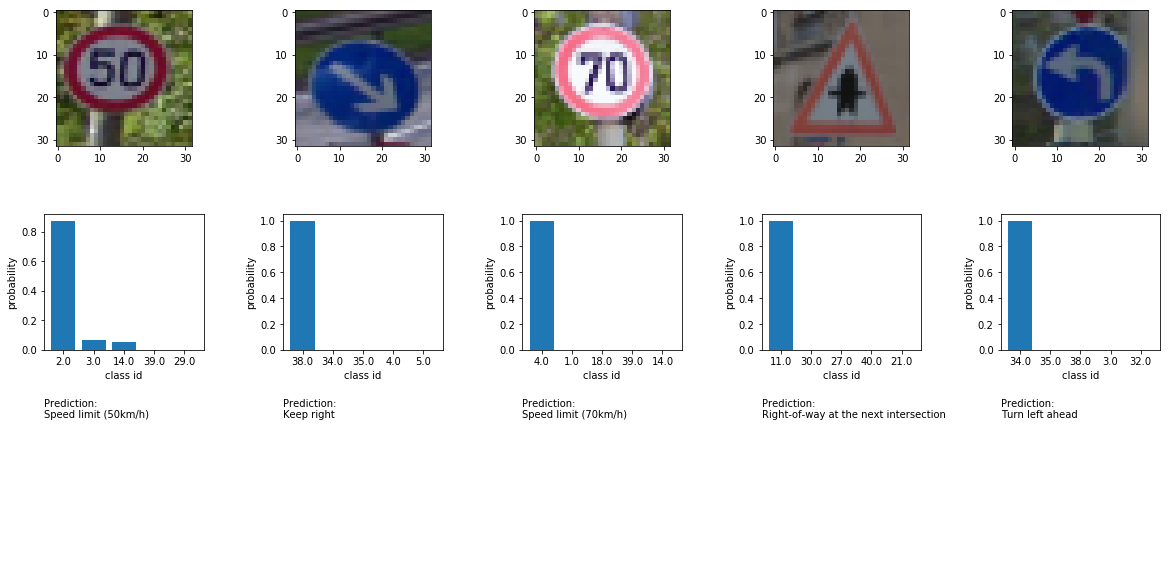

In [65]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(3,5)
gs.update(wspace = 0.5, hspace = 0.5)

print('\n   **************************************** IMAGES AND PREDICTIONS *************************************************')
top5_probs = np.array(top5_probs)
#print(type(top5_probs), top5_probs.shape, top5_probs[0,0,:], len(np.arange(5)))
for i in range(len(X_webimages)):
    plt.subplot(gs[0,i])
    plt.imshow(web_images[i].squeeze())
    plt.subplot(gs[1,i])
    plt.bar(np.arange(5),top5_probs[0,i,:], align='center')
    plt.xticks(np.arange(5),top5_probs[1,i,:])
    plt.xlabel('class id')
    plt.ylabel('probability')
    plt.subplot(gs[2,i])
    plt.axis('off')
    lbl = find_signname(np.array([int(top5_probs[1,i,0])]))[0]
    plt.annotate('Prediction:\n' + lbl,(0,0),(0,1))
    

### Analyze Performance

In [38]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

webimages_acc = 100*(np.mean(y_webimages == top5_probs[1,:,0]))
print("Accuracy of test webimages classification is %.1f%%" % (webimages_acc))



Accuracy of test webimages classification is 100.0%


In [39]:
#Given an array of class numbers, returns the array of class labels 

def find_signname(sign_index):
       
    sign_names = {
        0:'Speed limit (20km/h)',
        1:'Speed limit (30km/h)',
        2:'Speed limit (50km/h)',
        3:'Speed limit (60km/h)',
        4:'Speed limit (70km/h)',
        5:'Speed limit (80km/h)',
        6:'End of speed limit (80km/h)',
        7:'Speed limit (100km/h)',
        8:'Speed limit (120km/h)',
        9:'No passing',
        10:'No passing for vehicles over 3.5 metric tons',
        11:'Right-of-way at the next intersection',
        12:'Priority road',
        13:'Yield',
        14:'Stop',
        15:'No vehicles',
        16:'Vehicles over 3.5 metric tons prohibited',
        17:'No entry',
        18:'General caution',
        19:'Dangerous curve to the left',
        20:'Dangerous curve to the right',
        21:'Double curve',
        22:'Bumpy road',
        23:'Slippery road',
        24:'Road narrows on the right',
        25:'Road work',
        26:'Traffic signals',
        27:'Pedestrians',
        28:'Children crossing',
        29:'Bicycles crossing',
        30:'Beware of ice/snow',
        31:'Wild animals crossing',
        32:'End of all speed and passing limits',
        33:'Turn right ahead',
        34:'Turn left ahead',
        35:'Ahead only',
        36:'Go straight or right',
        37:'Go straight or left',
        38:'Keep right',
        39:'Keep left',
        40:'Roundabout mandatory',
        41:'End of no passing',
        42:'End of no passing by vehicles over 3.5 metric tons' }
    
    return [sign_names[i] for i in sign_index] 


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [40]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
for i in range(len(y_webimages)):
    print("Image %d top probablities\n %s \n\n" % (i+1, str(top5_probs[0,i,:])))

Image 1 top probablities
 [  8.76486421e-01   6.63876012e-02   5.69852367e-02   8.36560430e-05
   3.91096110e-05] 


Image 2 top probablities
 [  1.00000000e+00   1.11978878e-15   7.18194914e-19   6.75129668e-19
   2.76709169e-20] 


Image 3 top probablities
 [  9.99998093e-01   1.85918100e-06   6.68139294e-11   5.68365598e-11
   3.60138948e-13] 


Image 4 top probablities
 [  1.00000000e+00   4.67255519e-15   3.33843298e-15   9.99678624e-18
   1.77986827e-20] 


Image 5 top probablities
 [  1.00000000e+00   4.04126013e-08   1.24393529e-09   2.66858231e-13
   6.64935433e-15] 




> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 